In [47]:
import csv
import pandas as pd
import shap
import sklearn
import numpy as np
import matplotlib
import interpret.glassbox
data = pd.read_csv('cohortpetit.csv')
data2 = pd.read_csv('cohort100.csv')

In [48]:
y = (data['i.coronari'])
data = data.drop(['i.death', 'id', 'i.coronari', 'i.angor', 'i.ami'], axis = 1)

In [49]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
# feature_names = [i for i in data.columns ]
X = data[feature_names]
# my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
# model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
# model_ebm.fit(X, y)
##########
X100 = data2[feature_names]

In [50]:
# a simple linear logistic model
model = sklearn.linear_model.LogisticRegression(max_iter=10000)
model.fit(X, y)

def model_adult_proba(x):
    return model.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model.predict_log_proba(x)
    return p[:,1] - p[:,0]




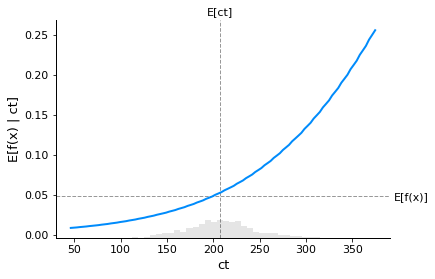

In [53]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "ct", model_adult_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


In [54]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X, max_samples=500)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X[:1000])



Permutation explainer: 1001it [01:00, 13.70it/s]                                


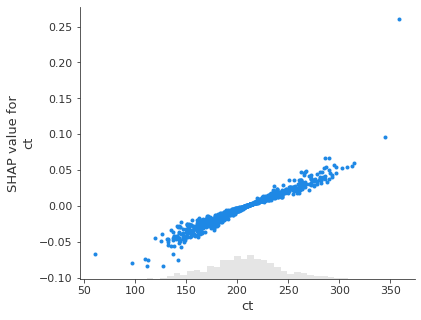

In [55]:
shap.plots.scatter(shap_values_adult[:,"ct"])

In [56]:
import xgboost
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[15:11:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


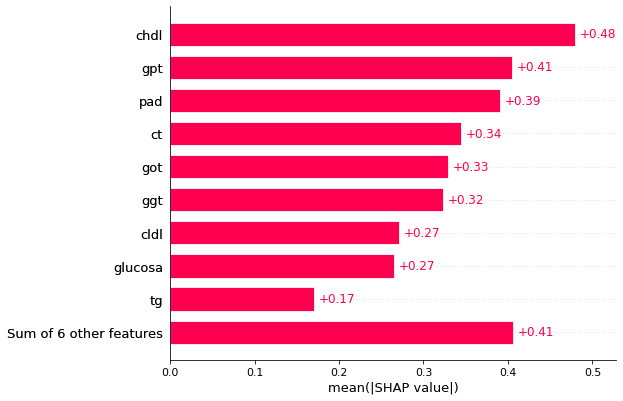

In [57]:
# By default a SHAP bar plot will take the mean absolute value of each feature over all the instances (rows) 
# of the dataset.
shap.plots.bar(shap_values)

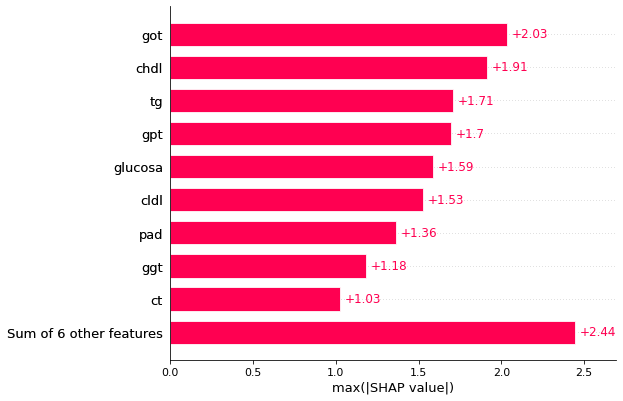

In [58]:
# using the max absolute value
shap.plots.bar(shap_values.abs.max(0))

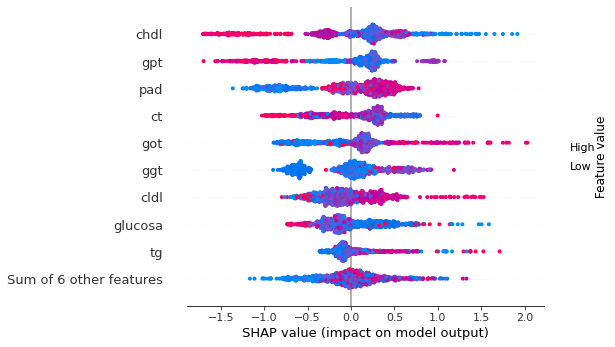

In [59]:
# Summarize the entire distribution of SHAP values for each feature
shap.plots.beeswarm(shap_values)

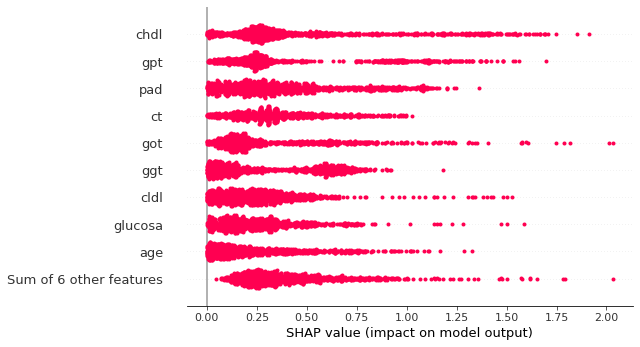

In [60]:
# taking the absolute value and using a solid color we get a compromise between the complexity of the bar plot 
# and the full beeswarm plot

shap.plots.beeswarm(shap_values.abs, color="shap_red")

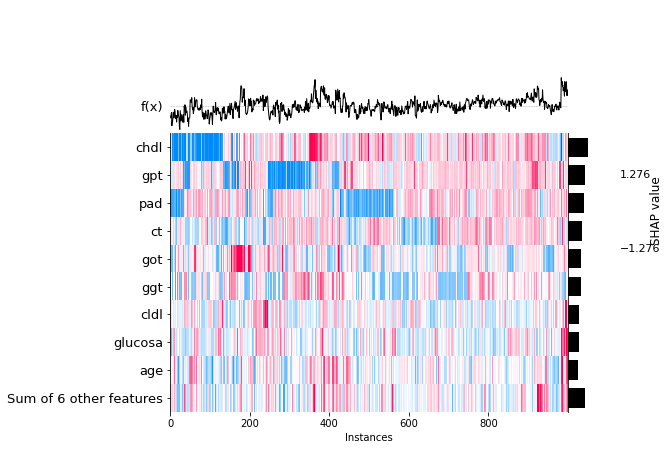

In [61]:
shap.plots.heatmap(shap_values[:1000])

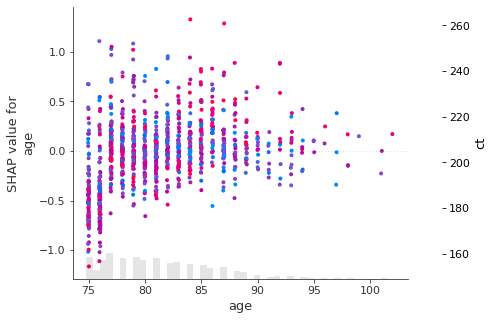

In [63]:
shap.plots.scatter(shap_values[:,"age"], color=shap_values[:,"ct"])